In [4]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv')
df.head()

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,22.618591,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,22.140549,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,22.216405,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,23.937781,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,23.527002,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


In [3]:
# Relationships are non-linear (concluded from correlation analysis):
#Models Chosen for trainign: Random Forests; Support Vector Regression (SVR); Neural Networks:

In [9]:
#Step 1: default hyperparameters; 3 different models

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X = df.drop(columns=['PSS_score', 'participant_id', 'day']) 
y = df['PSS_score'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(max_iter=1000)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R2': r2}

print("Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']}, R2 = {metrics['R2']}")

Model Performance:
Random Forest: RMSE = 8.477459810186854, R2 = -0.01910557052372841
SVR: RMSE = 8.42663125516091, R2 = -0.006921643653640341
Neural Network: RMSE = 8.55357402749313, R2 = -0.03748764384295322


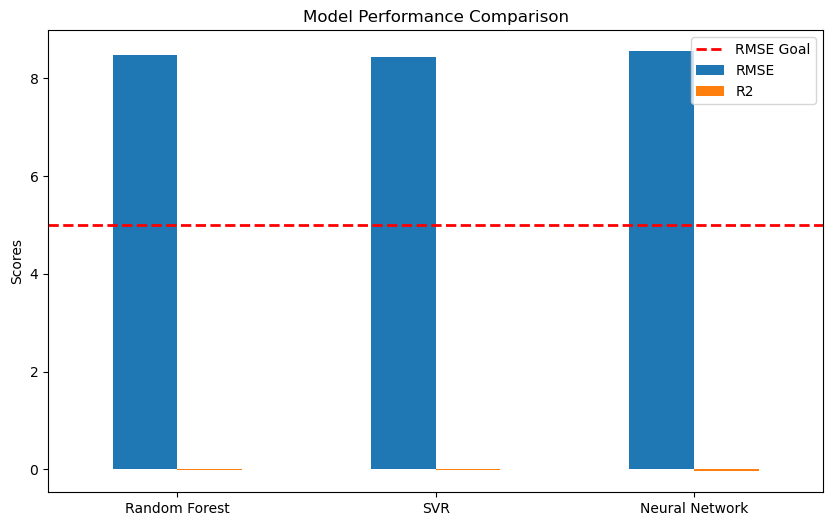

In [17]:
#comparison of models' performance
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.axhline(y=5, color='r', linestyle='--', linewidth=2, label='RMSE Goal')
plt.legend()
plt.savefig("model_rmse_comparison.pdf", format="pdf", bbox_inches="tight", transparent=False, dpi=300)
plt.show()